<a href="https://colab.research.google.com/github/adhiiy/Mini-Project-Team-8-understanding-regression-using-spending-habits/blob/main/understanding_regression_using_spending_habits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Disclaimer
* I am someone who is still fairly new to the field of data science and machine learning so much of my code and practices may not be ideal. But I do hope that this notebook can provide you with a good general understanding of using machine learning for regression.

* If you are more experienced than me and notice problems, please feel free to let me know.

* Most of the information in this notebook on building the model is from the course "Supervised Machine Learning Regression Classification" by Andrew Ng on Coursera. Please check out that course if you're interested, the explainations in that course were honestly amazing.

# Objective
This will be a simple practice lab of implementing multivariate regression in order to predict the spending habits of a given student.

The data given by the data set is purely fictional, therefore this notebook should only be used for practicing data analysis techniques and should not be used for any actual application.

# Exploratory Data Analysis
Here we will view and explore the data to get a better understanding of what features we can include in our regression.

In [ ]:
# viewing the data
spending = pd.read_csv('/kaggle/input/student-spending-dataset/student_spending (1).csv')

print('First Few rows')
print(spending.head())
print('\n')
print('Info')
print(spending.info())

First Few rows
   Unnamed: 0  age      gender year_in_school             major  \
0           0   19  Non-binary       Freshman        Psychology   
1           1   24      Female         Junior         Economics   
2           2   24  Non-binary         Junior         Economics   
3           3   23      Female         Senior  Computer Science   
4           4   20      Female         Senior  Computer Science   

   monthly_income  financial_aid  tuition  housing  food  transportation  \
0             958            270     5939      709   296             123   
1            1006            875     4908      557   365              85   
2             734            928     3051      666   220             137   
3             617            265     4935      652   289             114   
4             810            522     3887      825   372             168   

   books_supplies  entertainment  personal_care  technology  health_wellness  \
0             188             41             

In [ ]:
# looking at missing values
print(spending.isna().sum())

Unnamed: 0                  0
age                         0
gender                      0
year_in_school              0
major                       0
monthly_income              0
financial_aid               0
tuition                     0
housing                     0
food                        0
transportation              0
books_supplies              0
entertainment               0
personal_care               0
technology                  0
health_wellness             0
miscellaneous               0
preferred_payment_method    0
dtype: int64


* Wowie no filling na needs to be done!! But we don't need this unnamed column since by the looks of it, it's just another index column and may get in the way of things later.

In [ ]:
spending.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)

### Now lets break down the spending into graphs that are easier to interpret and then compare it across groups
How can we do this?
1. Create a new pandas series with the mean for all students, this will just essentially be our baseline
2. Then we create more series with the mean for students of a group that we are filtering by i.e. Major, Year, Gender, Age
3. Lastly we compare across groups

In [ ]:
# the actual things that students spend money on
spendings = ['tuition', 'housing', 'food', 'transportation', 'books_supplies', 'entertainment', 'personal_care', 'technology', 'health_wellness', 'miscellaneous']

In [ ]:
# creating series for spendings
total_mean = spending[spendings]
total_mean = total_mean.mean()

print(total_mean)

tuition            4520.395
housing             696.006
food                252.642
transportation      124.637
books_supplies      174.761
entertainment        84.814
personal_care        60.699
technology          178.304
health_wellness     114.310
miscellaneous       108.910
dtype: float64


Mean Spending for a Student is  6315.478


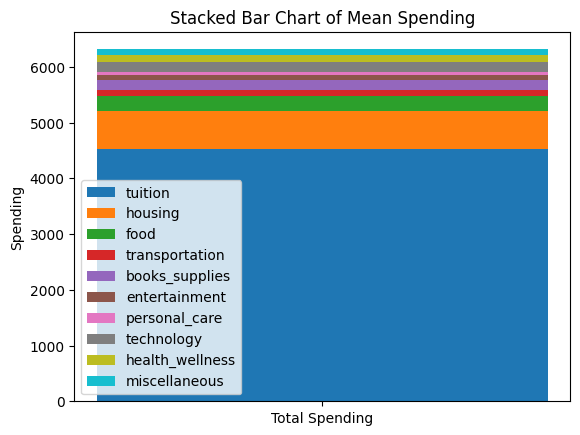

In [ ]:
categories = total_mean.index
heights = total_mean.values

bottom = 0
for category, height in zip(categories, heights):
    plt.bar('Total Spending', height, bottom=bottom, label=category)
    bottom += height

plt.ylabel('Spending')
plt.title('Stacked Bar Chart of Mean Spending')
plt.legend()

print('Mean Spending for a Student is ', total_mean.sum())

* We see that the vast majority of this spending is consumed by the tuition. Now lets view the spending seperated by the major of the individual.

In [ ]:
total_spend = total_mean.sum()
print(total_spend)

major_mean = spending[spending['major'] == 'Psychology']
major_mean = major_mean[spendings]
major_mean = major_mean.mean()
comp_sci_spend = major_mean.sum()
print(comp_sci_spend)

6315.478
6455.217391304348


In [ ]:
majors = spending['major'].unique()
print(majors)

['Psychology' 'Economics' 'Computer Science' 'Engineering' 'Biology']


(6000.0, 6500.0)

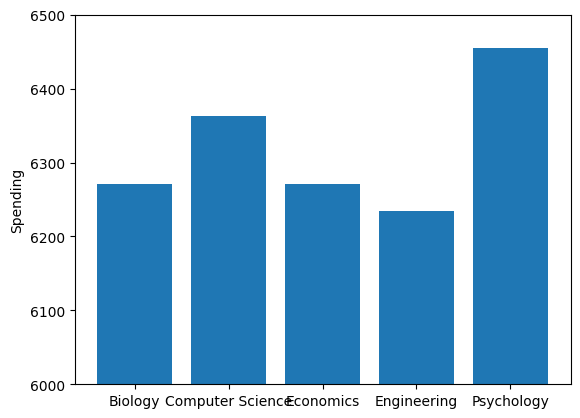

In [ ]:
# mean spending by major
# for ax, major in zip(axes.flatten(), majors):
#     major_mean = spending[spending['major'] == major]
#     # it's probably not best practice to have a variable named spending and another named spendings
#     major_mean = major_mean[spendings]
#     major_mean = major_mean.mean()
#     categories = major_mean.index
#     heights = major_mean.values

#     bottom = 0
#     for category, height in zip(categories, heights):
#         ax.bar('Total Spending', height, bottom=bottom, label=category)
#         bottom += height

#     ax.set_ylabel('Spending')
#     ax.set_title(f'Mean Spending for {major} Majors')
#     ax.legend()

# ^ code for plotting stacked bar charts, not working too well and also stacked bar charts not
# necessary as this is mostly for comparing the difference in total spending habits rather than
# by category


by_majors = spending.groupby('major')[spendings].mean().reset_index() #return a dataframe with the mean spending of each major

# making bar charts
category = by_majors['major'].values
heights = by_majors[spendings].sum(axis = 1).values

plt.bar(category, heights)
plt.ylabel('Spending')
plt.ylim(6000, 6500)


**Observations:**
There seems to be some difference in the spendings by majors but not much. This could be because the dataset used is fictional and thus does not take into account the different factors that can influence the spendings of a student.

But lets Try this again but with different features such as age, gender, monthly income, financial aid, and preferred payment method

(6000.0, 6500.0)

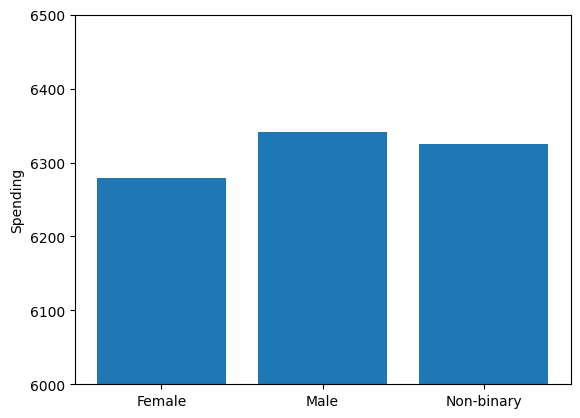

In [ ]:
# spending by gender
genders = spending['gender'].unique()

by_genders = spending.groupby('gender')[spendings].mean().reset_index()

# making bar charts
category = by_genders['gender'].values
heights = by_genders[spendings].sum(axis = 1).values

plt.bar(category, heights)
plt.ylabel('Spending')
plt.ylim(6000,6500)

Again there is little to no difference

(6000.0, 6500.0)

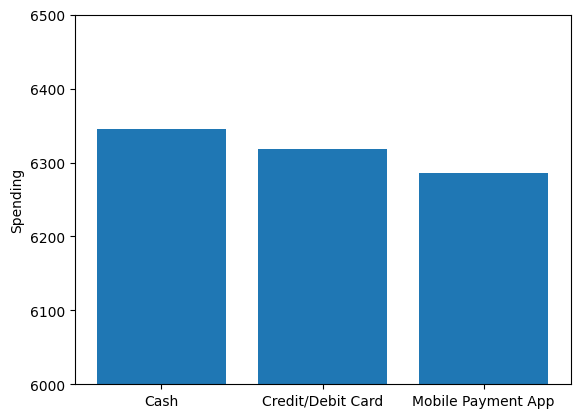

In [ ]:
# spending by preferred payment method
pref_pay_method = spending['preferred_payment_method'].unique()

by_pref_pay_method = spending.groupby('preferred_payment_method')[spendings].mean().reset_index()

# making bar charts
category = by_pref_pay_method['preferred_payment_method'].values
heights = by_pref_pay_method[spendings].sum(axis = 1).values

plt.bar(category, heights)
plt.ylabel('Spending')
plt.ylim(6000,6500)

Still very minor differences

(6000.0, 6500.0)

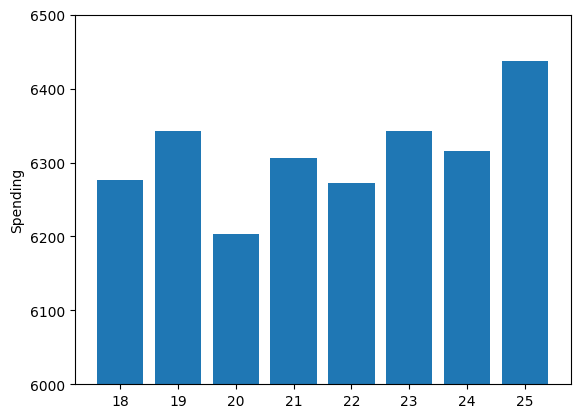

In [ ]:
# spending by age
age = spending['age'].unique()

by_age = spending.groupby('age')[spendings].mean().reset_index()

# making bar charts
category = by_age['age'].values
heights = by_age[spendings].sum(axis = 1).values

plt.bar(category, heights, width = 0.8)
plt.ylabel('Spending')
plt.ylim(6000,6500)

Wowie there appears to be some sort of correlation between spending and age but keep in mind that this is a very zoomed in view of the graph.

Text(0.5, 0, 'Monthly Income')

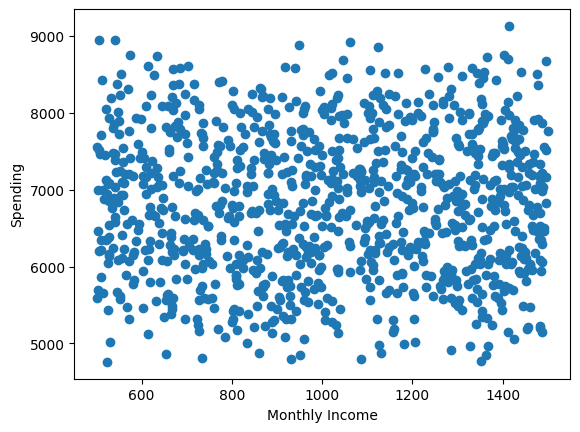

In [ ]:
# spending by monthly_income
by_monthly_inc = spending['monthly_income'].reset_index()
by_spendings = spending[spendings].reset_index()
by_monthly_inc['spending'] = by_spendings.sum(axis = 1)

plt.scatter(by_monthly_inc['monthly_income'], by_monthly_inc['spending'])
plt.ylabel('Spending')
plt.xlabel('Monthly Income')

Little to no correlation between spending and monthly income

Text(0.5, 0, 'Financial Aid')

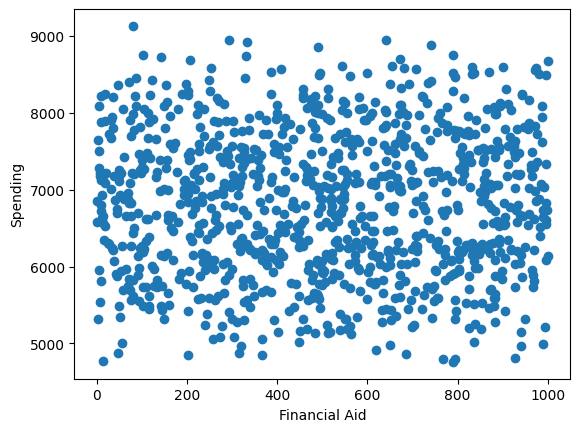

In [ ]:
# spending by financial_aid
by_fin_aid = spending['financial_aid'].reset_index()
by_spendings = spending[spendings].reset_index()
by_fin_aid['spending'] = by_spendings.sum(axis = 1)

plt.scatter(by_fin_aid['financial_aid'], by_fin_aid['spending'])
plt.ylabel('Spending')
plt.xlabel('Financial Aid')

Little Correlation between spending and financial aid

### Splitting Data into Training and Test Set
**Purpose of Each Set:**
Training: Meant to train the model and obtain optimized parameters
Testing: Taking the final model with the optimized parameters and testing it. Meant to be a simulation of a real life application of the data.

Since Our Data is relatively small (1000 observations) we will have relatively large cross validation and test sets with respect to the training set. So we will use 70% for testing and 30% for testing. These numbers are fairly arbitrary so they can be modified depending on preferences.

In [ ]:
# should have done this a lot earlier to make the visualization simpler ehe
# don't be like me, do this when cleaning your data
spending['Spending'] = spending[spendings].sum(axis = 1)
print(spending.head())

   age      gender year_in_school             major  monthly_income  \
0   19  Non-binary       Freshman        Psychology             958   
1   24      Female         Junior         Economics            1006   
2   24  Non-binary         Junior         Economics             734   
3   23      Female         Senior  Computer Science             617   
4   20      Female         Senior  Computer Science             810   

   financial_aid  tuition  housing  food  transportation  books_supplies  \
0            270     5939      709   296             123             188   
1            875     4908      557   365              85             252   
2            928     3051      666   220             137              99   
3            265     4935      652   289             114             223   
4            522     3887      825   372             168             194   

   entertainment  personal_care  technology  health_wellness  miscellaneous  \
0             41             78      

The Regression Model will take in the features of
* age
* gender
* major
* payment method

As these are the only features that had some sort of correlation with the total spending of the student. Try playing around with the features and seeing how the model does.

In [ ]:
features = ['age', 'gender', 'major', 'preferred_payment_method']
# we also have to clean up the spendings dataframe a bit since some of the features are categorical
# turn categorical variables into dummy variables

In [ ]:
for feature in features[1:]:
    print(f'Unique number of categories in {feature}: {spending[feature].unique()}')

Unique number of categories in gender: ['Non-binary' 'Female' 'Male']
Unique number of categories in major: ['Psychology' 'Economics' 'Computer Science' 'Engineering' 'Biology']
Unique number of categories in preferred_payment_method: ['Credit/Debit Card' 'Cash' 'Mobile Payment App']


In [ ]:
dummy_df1 = pd.get_dummies(spending['gender'])
dummy_df2 = pd.get_dummies(spending['major'])
dummy_df3 = pd.get_dummies(spending['preferred_payment_method'])

dummy_df = pd.concat([dummy_df1, dummy_df2, dummy_df3], axis=1)
dummy_df['age'] = spending['age']
print(dummy_df.head())

   Female   Male  Non-binary  Biology  Computer Science  Economics  \
0   False  False        True    False             False      False   
1    True  False       False    False             False       True   
2   False  False        True    False             False       True   
3    True  False       False    False              True      False   
4    True  False       False    False              True      False   

   Engineering  Psychology   Cash  Credit/Debit Card  Mobile Payment App  age  
0        False        True  False               True               False   19  
1        False       False  False               True               False   24  
2        False       False   True              False               False   24  
3        False       False  False              False                True   23  
4        False       False  False               True               False   20  


In [ ]:
# splitting data
X_train = dummy_df.iloc[:700].values
Y_train = spending.iloc[:700]['Spending'].values

X_test = dummy_df.iloc[700:1000].values
Y_test = spending.iloc[700:1000]['Spending'].values

print(X_train.shape)
print(Y_train.shape)

(700, 12)
(700,)


# Building the Regression Model

\*Note: the following code takes a lot of code and equations from the labs provided in the Machine Learning Specialization by Andrew Ng on Coursera.

## How Linear Regression Works

1. General Equation for the predicted value in univariate linear regression. Multivariate regression essentially works in the same way but with more weightings and more variables x.
    $$f_{w,b}(x) = wx + b$$
    

2. Compute the cost. For now we are just going to use mean square error because it is simple and it gets the job done.
    - Cost Function:

    $$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$

3. Use Gradient Descent to find the optimal parameters for w and b given your dataset
      - Gradient Descent:
      $$b := b -  \alpha \frac{\partial J(w,b)}{\partial b}$$
      $$w := w -  \alpha \frac{\partial J(w,b)}{\partial w}$$
      Where $\alpha$ is the learning rate and $\frac{\partial J(w,b)}{\partial variable}$ is the partial derivative of the cost function with respect to one of the parameters
      
\* more will be explained about Cost and Gradient Descent Later

### Cost Function

The cost function can be thought of as a measure of how close the prediction made by the model given the parameters **w** and **b** are to the actual output. As **w** and **b** change with gradient descent, the loss associated with the parameters for **w** and **b** will also change.

In [ ]:
def compute_cost(X, Y, w, b):
    """
    X: numpy array: Shape (m,n)   Input Data
    Y: numpy array: Shape (m,)    Expected Output
    w: numpy array: Shape (n,)    Weightings
    b: scalar:  Bias
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - Y[i])**2
    cost = cost / (2 * m)
    return cost

# the code below provides a more detailed idea of what is going on but runs a lot slower since it does not utilize vectorization with np.dot()

# m, n = X.shape
#     total_cost = 0
#     cost_sum = 0
#     for i in range(m):
#         f_wb = 0
#         for j in range(n):
#             f_wb_j = w[j] * X[i][j]
#             f_wb += f_wb_j
#         f_wb += b
#         cost_i = (f_wb - y[i])**2
#         cost_sum = cost_sum + cost_i

#     total_cost = cost_sum / (2*m)

### Gradient Descent
The general formula for gradient descent in univariate linear regression is:
$$b := b -  \alpha \frac{\partial J(w,b)}{\partial b}$$
$$w := w -  \alpha \frac{\partial J(w,b)}{\partial w}$$

where, parameters **w** and **b** are both updated simultaniously and where  
$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$


In [ ]:
def compute_gradient(X, Y, w, b):
    """
    X: numpy array: Shape (m,n)   Input Data
    Y: numpy array: Shape (m,)    Expected Output
    w: numpy array: Shape (n,)    Weightings
    b: scalar:  Bias
     """
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - Y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [ ]:
import math
def gradient_descent(X, Y, w, b, cost_function, gradient_function, alpha, num_iters):
    """
    X: numpy array: Shape (m,n)   Input Data
    y: numpy array: Shape (m,)    Expected Output
    w: numpy array: Shape (n,)    Weightings
    b: float                      Bias
    cost_function:                function to compute cost made earlier
    gradient_function:            function to compute the gradient
    alpha: (float):               Learning rate
    num_iters: (int):             number of iterations to run gradient descent
      """
    for i in range(num_iters):

        # Computing the gradient
        dj_db,dj_dw = gradient_function(X, Y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            J = cost_function(X, Y, w, b)
            print(f"Iteration {i:4d}: Cost {J:8.2f}   ")

    return w, b # returning the optimal w and b parameters found using the model

# Testing
The fun stuff!!!!

In [ ]:
print(X_train)

[[False False True ... True False 19]
 [True False False ... True False 24]
 [False False True ... False False 24]
 ...
 [False False True ... False True 18]
 [False False True ... True False 23]
 [False False True ... False True 19]]


In [ ]:
# training the model
w = np.random.randn(12,) # the reason it is 12 is because there are 12 features in x train
b = np.random.randn()
alpha = 0.003 # found using trial and error
num_iters = 30000

w_opt, b_opt = gradient_descent(X_train, Y_train, w, b, compute_cost, compute_gradient, alpha, num_iters)

Iteration    0: Cost 4176091.89   
Iteration 3000: Cost 531371.51   
Iteration 6000: Cost 487616.20   
Iteration 9000: Cost 457942.05   
Iteration 12000: Cost 437729.90   
Iteration 15000: Cost 423959.69   
Iteration 18000: Cost 414578.17   
Iteration 21000: Cost 408186.62   
Iteration 24000: Cost 403832.11   
Iteration 27000: Cost 400865.42   


In [ ]:
# testing the model:
m = X_test.shape[0]
for i in range(10):
    rand_index = np.random.randint(m)
    prediction = np.dot(X_test[i], w_opt) + b_opt
    actual = Y_test[i]
    print(f"prediction: {prediction:0.2f}, target value: {actual}, discrepency: {prediction - actual:0.2f}")

prediction: 6364.64, target value: 7424, discrepency: -1059.36
prediction: 6163.01, target value: 6795, discrepency: -631.99
prediction: 6203.97, target value: 4577, discrepency: 1626.97
prediction: 6304.52, target value: 7866, discrepency: -1561.48
prediction: 6102.07, target value: 6357, discrepency: -254.93
prediction: 6378.34, target value: 7852, discrepency: -1473.66
prediction: 6542.46, target value: 5372, discrepency: 1170.46
prediction: 6222.72, target value: 4864, discrepency: 1358.72
prediction: 6470.83, target value: 7346, discrepency: -875.17
prediction: 6343.68, target value: 6575, discrepency: -231.32


### Conclusions
Ok so it seems that our model isn't really able to predict the actual value of the spending, this can be potentially due to many reason:
- Overfitting: By running too many iterations, our model may be memorizing the training data rather than being able to generalize from the training data to make predictions.
- Inadequate features: perhaps there were other features that we could have trained the model on but didn't due to not going in depth enough during the exploratory phase of data analysis
- Nature of the data: given that the data is fictional, there could be a possibility that there is little correlation between the features and the actual data.